In [1]:
# Kruskal-Wallis Test
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import statsmodels.api as sm
from scipy.stats import shapiro, levene, kruskal

np.random.seed(47); plt.style.use('dark_background')

# Let's generate data: 3 groups with unequal means
group1, group2, group3 = map(
    lambda loc: np.random.laplace(loc=loc, scale=5, size=100), 
    [20, 21, 22]
)
data = pd.DataFrame({
    'Value': np.concatenate([group1, group2, group3]),
    'Group': np.repeat(['Group 1', 'Group 2', 'Group 3'], 
                       [group1.size, group2.size, group3.size]
                      )
})
data.sample(3, random_state=4)

,Value,Group
293,31.380936,Group 3
166,21.496814,Group 2
18,16.936092,Group 1


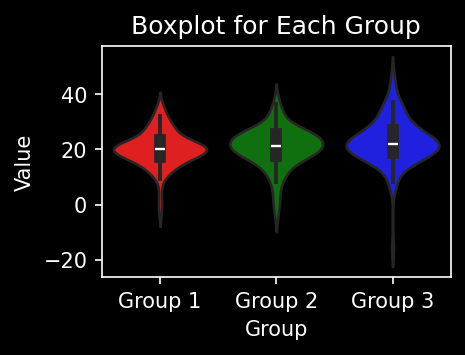

In [2]:
# Homoscedasticity (equal variance)
plt.style.use('dark_background')
plt.figure(figsize=(3, 2), dpi=150)
sns.violinplot(x='Group', y='Value', data=data, hue='Group', 
               palette=['red', 'green', 'blue'])
plt.title('Boxplot for Each Group')
plt.xlabel('Group')
plt.ylabel('Value')
plt.show()

The **Levene's test** is a statistical test used to assess the **equality of variances** across different groups by evaluating the **absolute deviations** from the group means (or medians). 
<br> <br>
If the p-value is less than **the set significance level (0.05 usually)**, it indicates significant evidence to reject the null hypothesis, suggesting that the **variances are not equal** across the groups.

In [3]:
# Levene’s Test
stat, p = levene(group1, group2, group3)
print(f"""Levene’s Test for Equality of Variances: 
W-statistic={stat:.4f}, p-value={p:.4f}""")

Levene’s Test for Equality of Variances: 
W-statistic=1.6269, p-value=0.1983


**Conclusion-1:** We failed to reject the null hypothesis that variances are equal. The samples are homoscedastic.

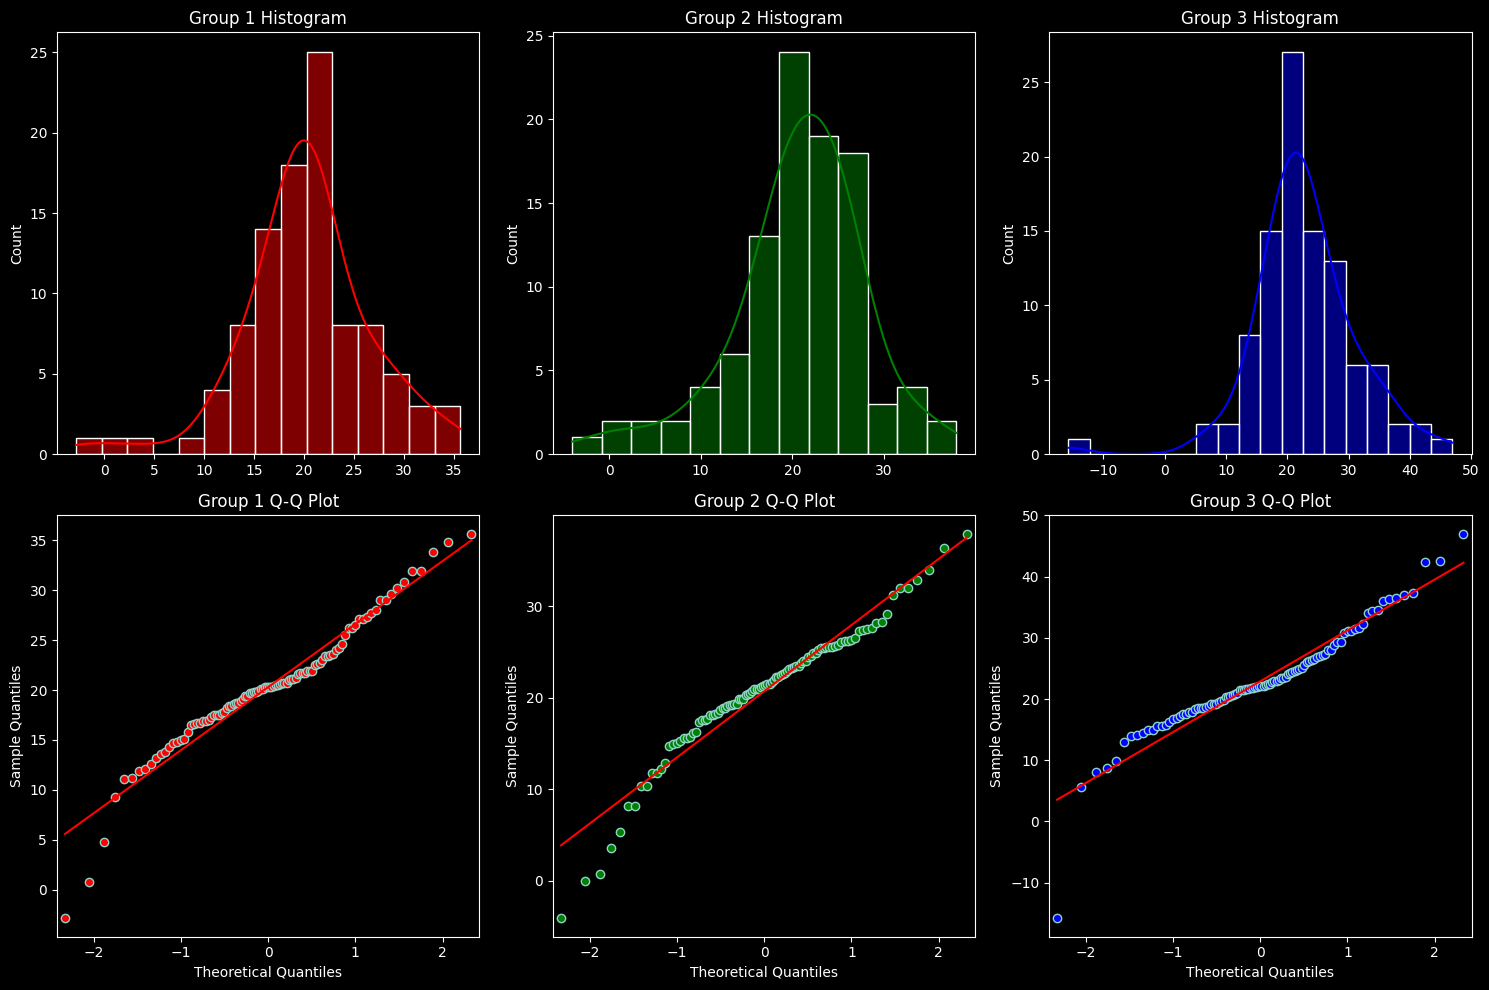

In [4]:
gs, cs = [group1, group2, group3], ['r','g','b']
ths = [f'Group {i+1} Histogram' for i in range(3)]
tqs = [f'Group {i+1} Q-Q Plot' for i in range(3)]
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
for i, (g, c, h, q) in enumerate(zip(gs, cs, ths, tqs)):
    sns.histplot(g, kde=True, ax=axes[0, i], color=c)
    sm.qqplot(g, line='s', ax=axes[1, i], markerfacecolor=c)
    axes[0, i].set_title(h); axes[1, i].set_title(q)
plt.tight_layout()
plt.show()

The **Shapiro-Wilk test** is a statistical test used to assess the **normality** of a dataset by comparing the observed distribution of data to a theoretical normal distribution. If the **p-value** is less than **the level of significance (0.05 usually)**, it indicates significant evidence to reject the **null hypothesis**, suggesting that the data does not follow a normal distribution.

In [5]:
# Shapiro-Wilk Test for normality
print("Shapiro-Wilk Test Results:")
for i, group in enumerate([group1, group2, group3], start=1):
    stat, p = shapiro(group)
    print(f"Group {i}: W-statistic={stat:.4f}, p-value={p:.4f}")

Shapiro-Wilk Test Results:
Group 1: W-statistic=0.9581, p-value=0.0030
Group 2: W-statistic=0.9542, p-value=0.0016
Group 3: W-statistic=0.9327, p-value=0.0001


**Conclusion-2:** None of the groups' population is normally distributed. 

In [6]:
stat, p_value = kruskal(group1, group2, group3)

print(f"""Kruskal-Wallis H-statistic: {stat:.4f} 
p-value: {p_value:.4f}""")

if p_value < 0.05:
    print('Reject the null hypothesis')
else:
    print('Fail to reject the null hypothesis')

Kruskal-Wallis H-statistic: 7.1659 
p-value: 0.0278
Reject the null hypothesis


### Final Conclusion
We generated data from a **Laplace distribution** (double exponential). **Levene's test** indicated equal variances across groups. The **Shapiro-Wilk test** confirmed that the samples do not follow a normal distribution. As the normality assumption for **ANOVA** is violated, we used the **Kruskal-Wallis test**, a non-parametric alternative to ANOVA. It shows we have sufficient efficience to reject the null hypothesis that is the medians of the three groups are equal.